# <center> Alphabet Recognition using SVM </center>

## Goal:
    

### The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. 

### The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. 

### Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. 


### We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.




### Data Link: http://archive.ics.uci.edu/ml/datasets/letter+recognition

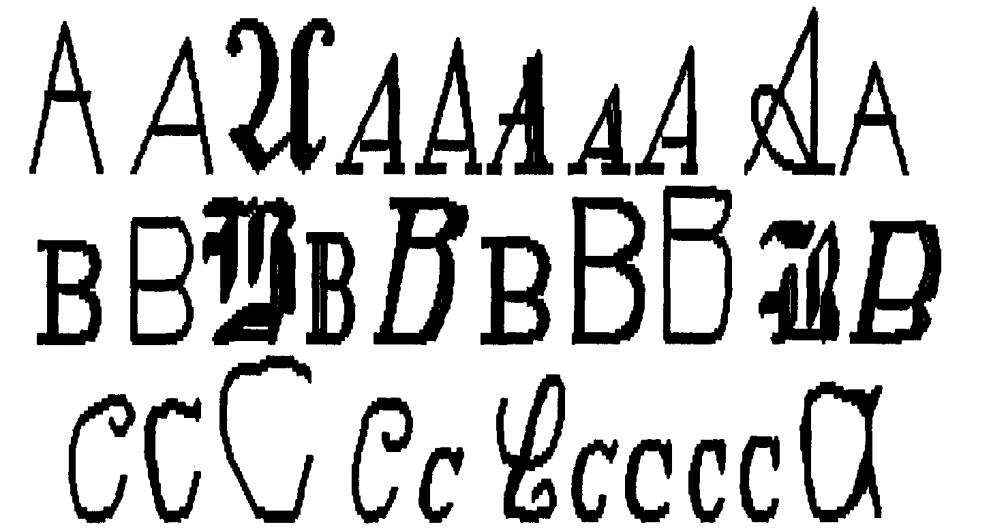

## Data Understanding

#### Importing necessary libraries

In [23]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

#### Reading the dataset

In [24]:
df = pd.read_csv("letter-recognition.csv")

#### Data Dictionary

|	Header	|	Definition	|
|	-------	|	-------	|
|	letter	|	lettr capital letter (26 values from A to Z)	|
|	xbox 	|	x-box horizontal position of box (integer)	|
|	ybox 	|	y-box vertical position of box (integer)	|
|	width 	|	width width of box (integer)	|
|	height	|	high height of box (integer)	|
|	onpix 	|	onpix total # on pixels (integer)	|
|	xbar 	|	x-bar mean x of on pixels in box (integer)	|
|	ybar 	|	y-bar mean y of on pixels in box (integer)	|
|	x2bar	|	x2bar mean x variance (integer)	|
|	y2bar 	|	y2bar mean y variance (integer)	|
|	xybar 	|	xybar mean x y correlation (integer)	|
|	x2ybar	|	x2ybr mean of x * x * y (integer)	|
|	xy2bar	|	xy2br mean of x * y * y (integer)	|
|	xedge 	|	x-ege mean edge count left to right (integer)	|
|	xedgey	|	xegvy correlation of x-ege with y (integer)	|
|	yedge 	|	y-ege mean edge count bottom to top (integer)	|
|	yedgex	|	yegvx correlation of y-ege with x (integer)	|


In [25]:
#dimensions
df.shape

(20000, 17)

In [26]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [27]:
#data description
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [28]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [29]:
#let's check the column names
df.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [30]:
#We can see some column names contain blank spaces and hence can make the analysis cumbersome hence we need to re-index that.
df.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [31]:
order = list(np.sort(df["letter"].unique()))
order

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

## Data Visualization

#### Let's create a pairplot to see how the features relate to each other


<Figure size 2160x2160 with 0 Axes>

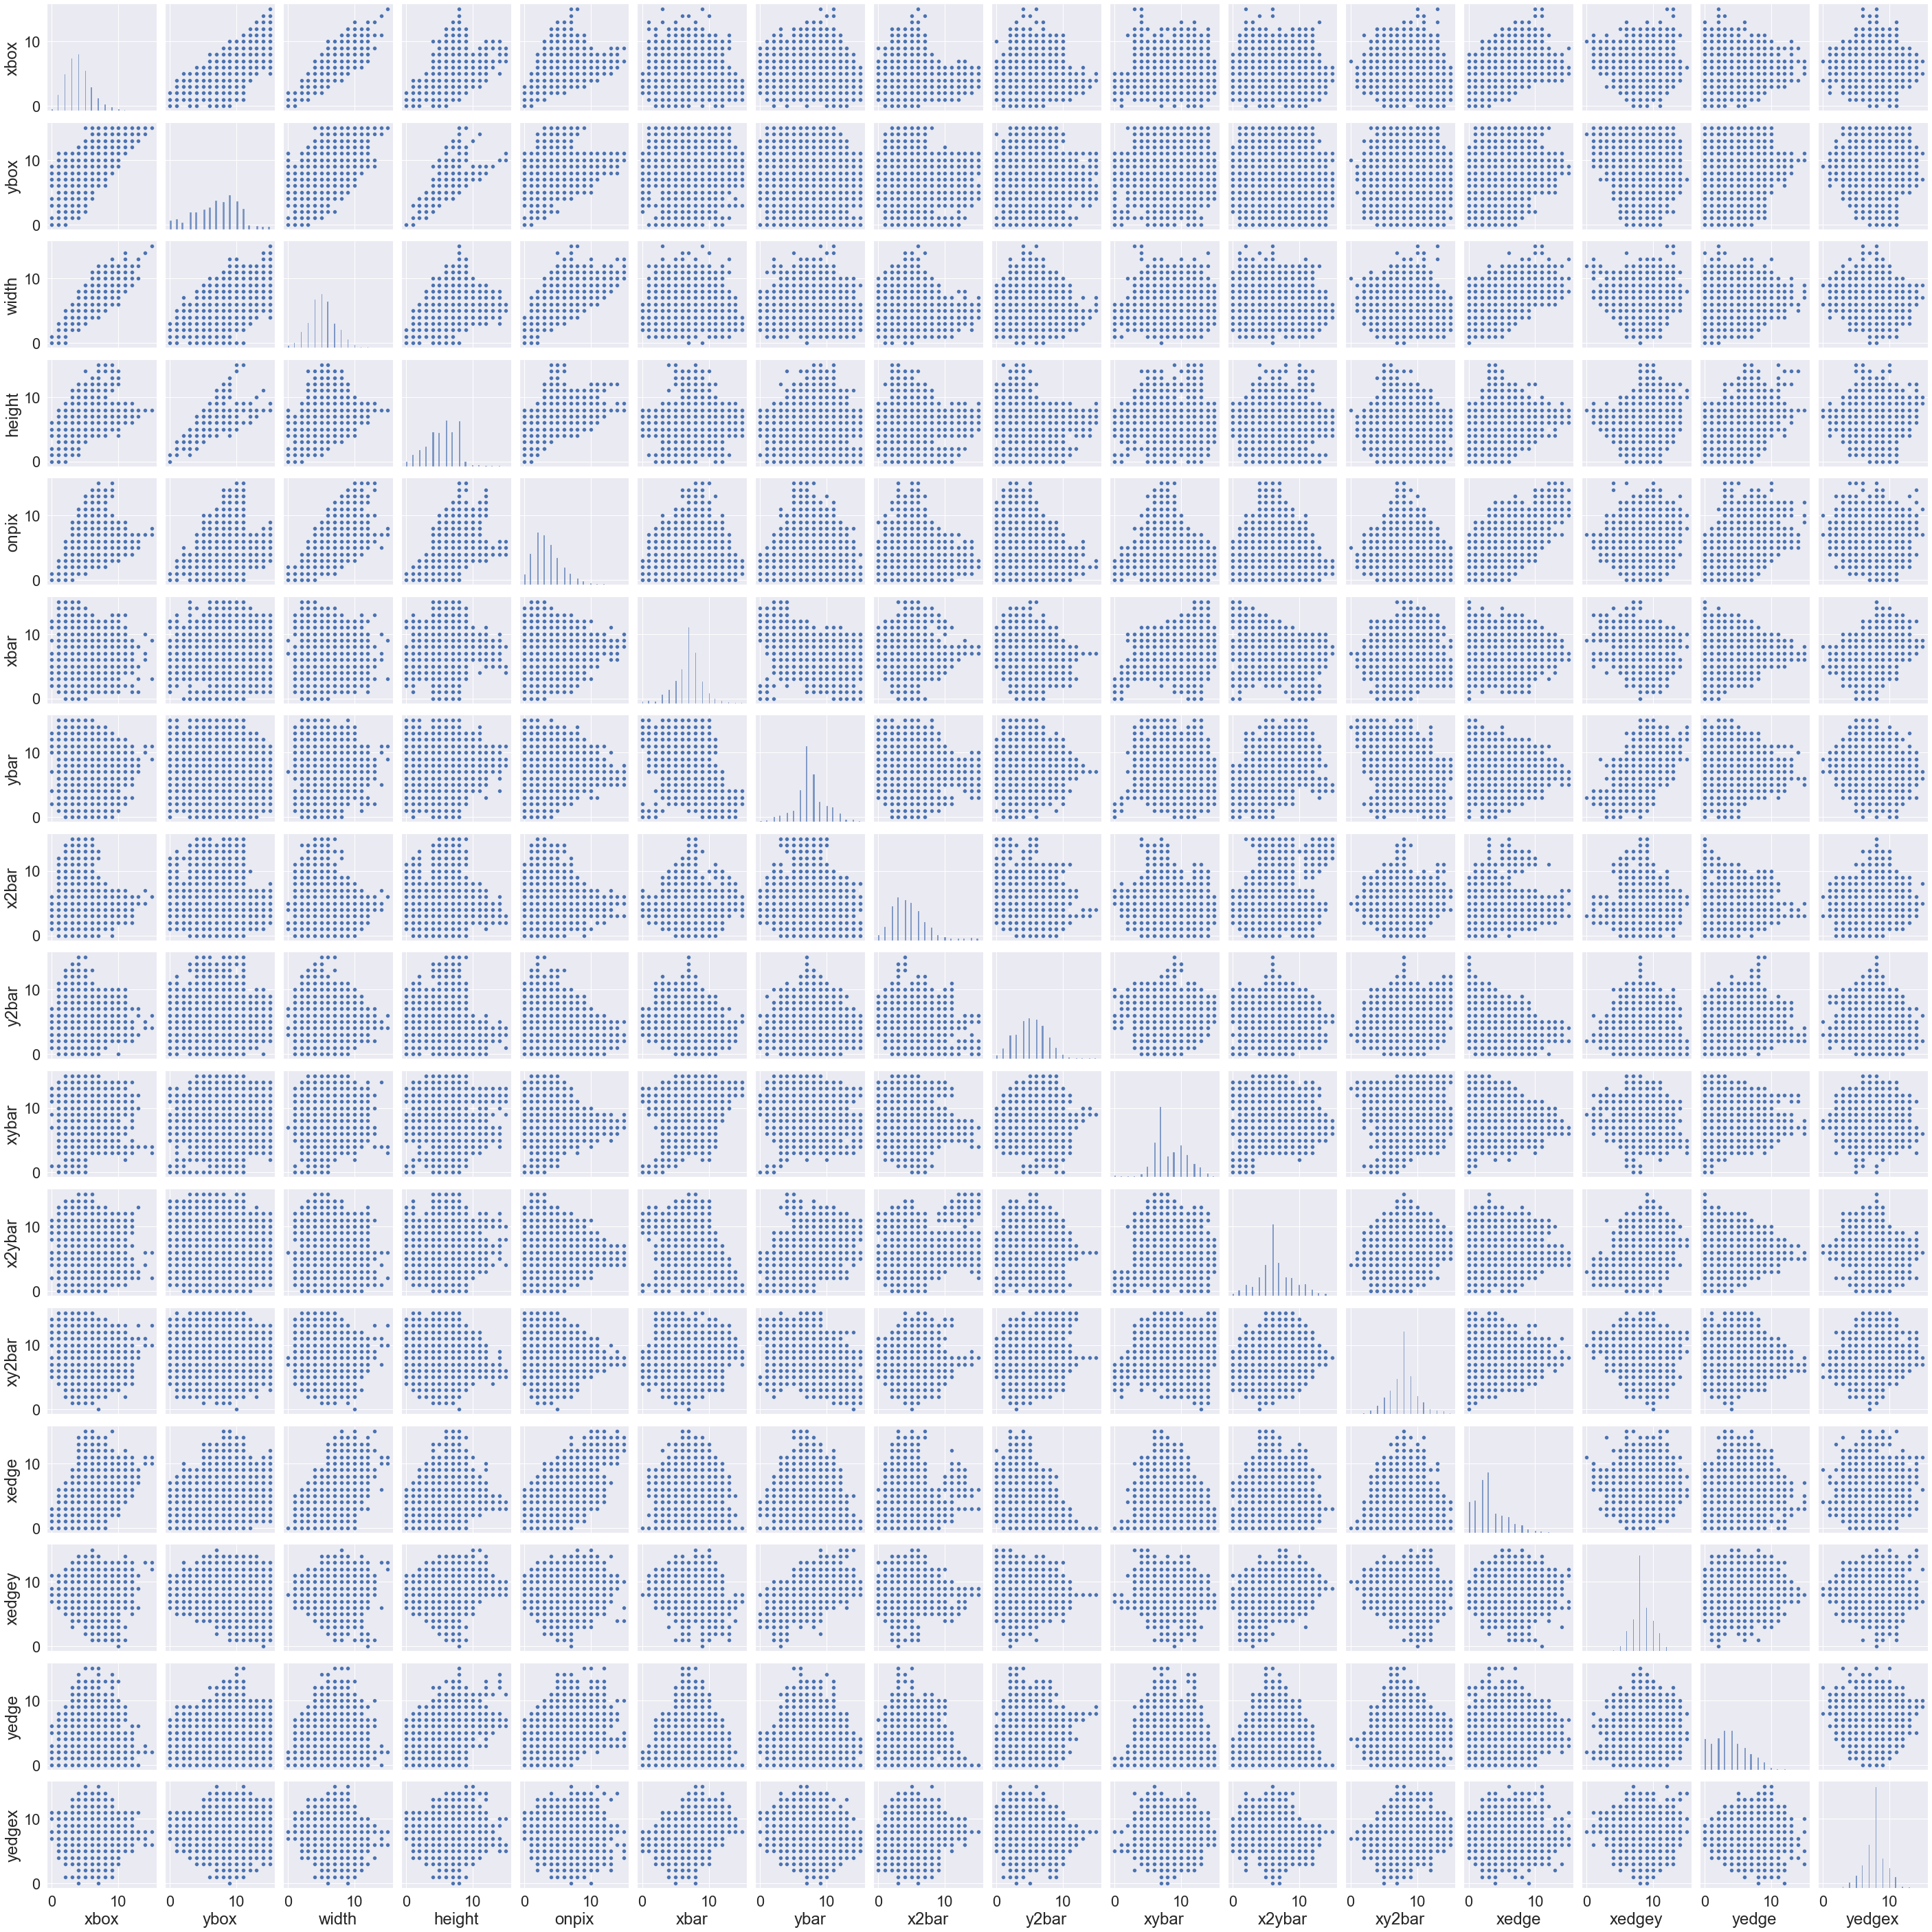

In [32]:
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.pairplot(df)
plt.show()

In [33]:
#creating a separate list for column indices
cols=['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']

#### Let's create a Boxplot to observe individual features

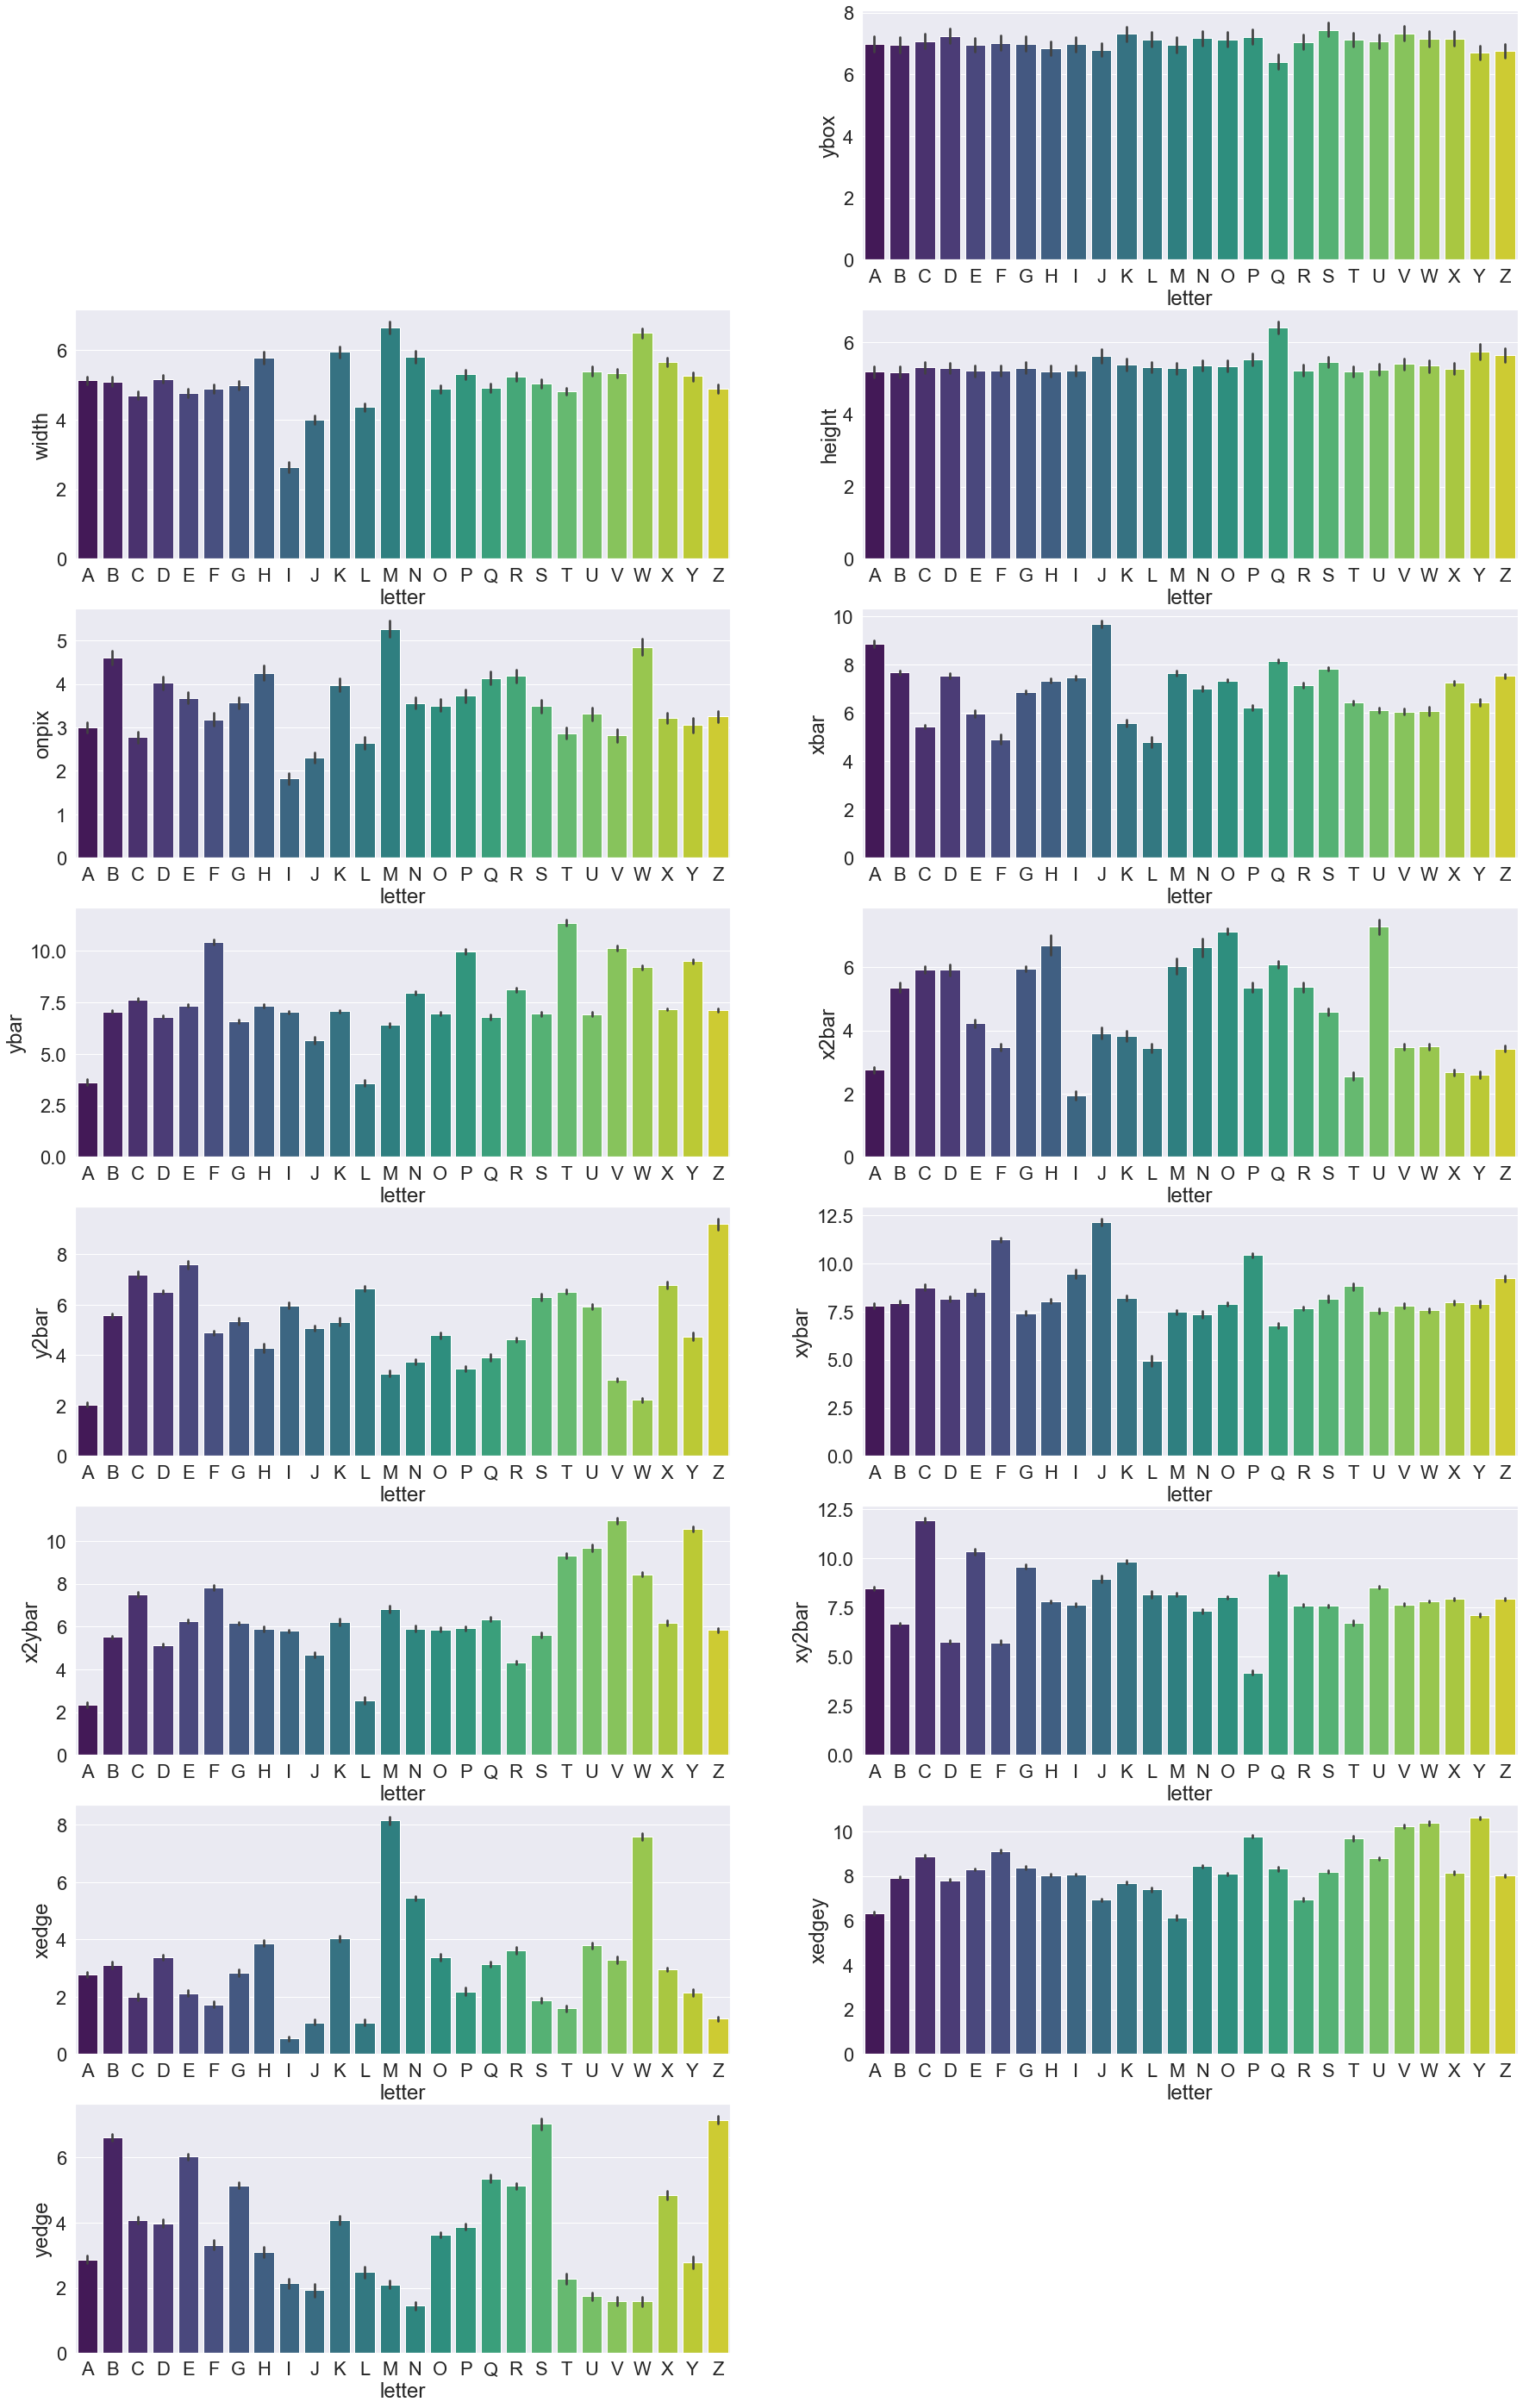

In [35]:
plt.figure(figsize=(30,50))
for i in range(1,len(cols)-1):
    plt.subplot(8,2,i + 1)
    sns.barplot(x='letter', y=cols[i], 
            data=df, 
            order=order, palette='viridis')

#### Let's create a heatmap to see feature correlations.

<AxesSubplot:ylabel='letter'>

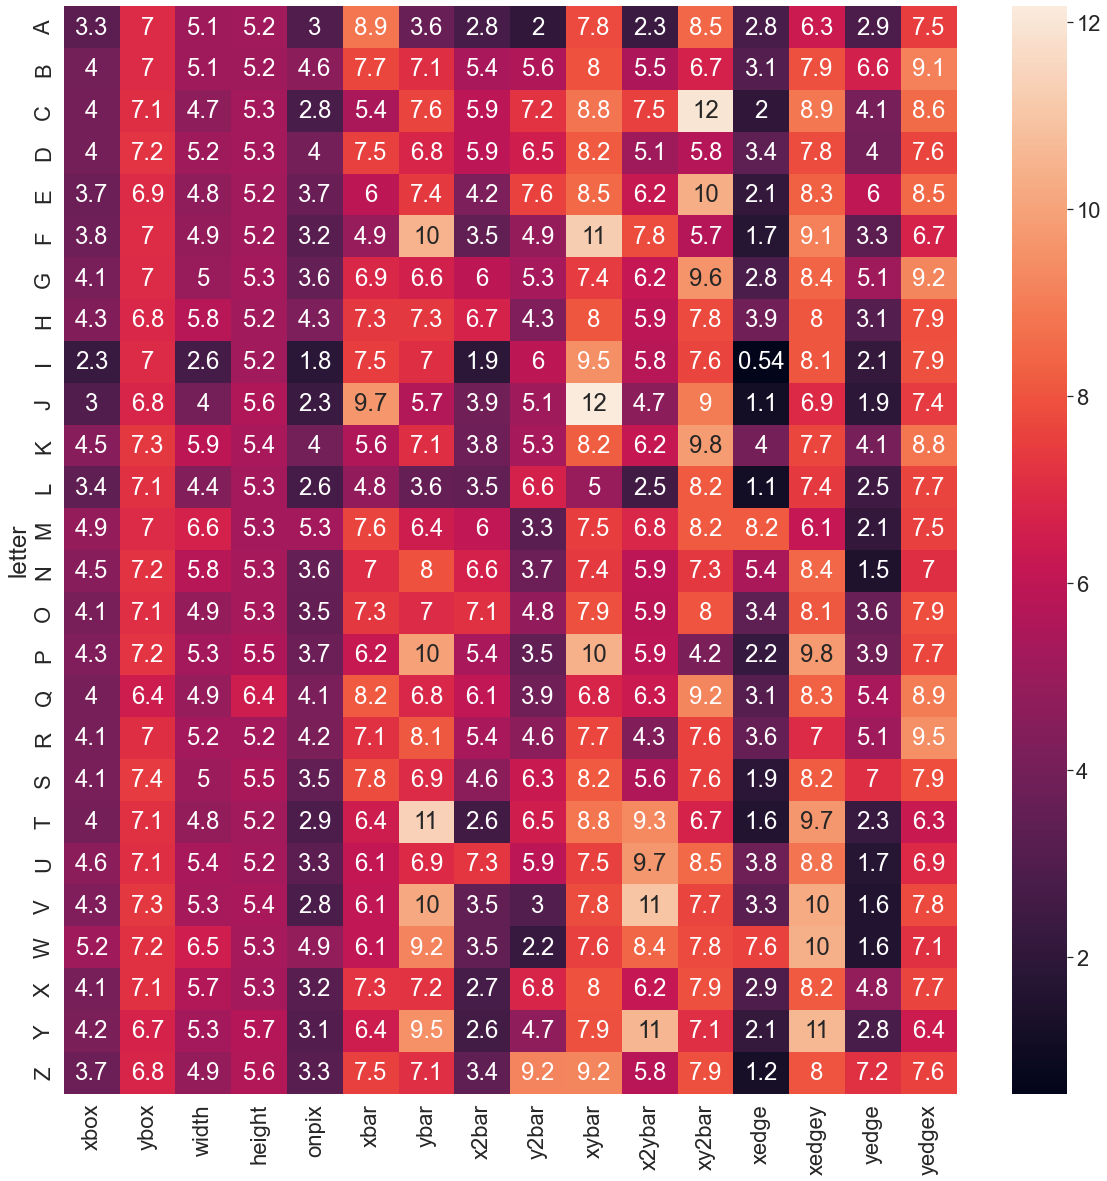

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(df.groupby('letter').mean(), annot=True)

## Data Preparation

In [37]:
#check for null values
df.isnull().sum().sum()

0

**Hence, there are no null values in the dataset**

#### Let's check the mean values of the columns.

In [38]:
round(df.drop("letter", axis=1).mean(),2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

## Model Building

In [39]:
y=df["letter"]
X=df.drop("letter", axis=1)

#### Scaling the features

In [40]:
X_scaled = scale(X)

In [41]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

#### Let's run the SVC with Linear, Polynomial and Radial Basis Function Kernels.

In [42]:
models = ["linear", "poly", "rbf"]

In [43]:
for i in models:
    print(f"===============Model type: {i}================")
    model=SVC(kernel=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
    print(metrics.classification_report(y_test, y_pred, digits=3))
    print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))
    
    

===============Model type: linear================
accuracy: 0.8523333333333334 

              precision    recall  f1-score   support

           A      0.861     0.947     0.902       209
           B      0.758     0.862     0.807       218
           C      0.870     0.870     0.870       230
           D      0.805     0.847     0.825       248
           E      0.846     0.872     0.859       234
           F      0.814     0.893     0.852       225
           G      0.705     0.763     0.732       219
           H      0.698     0.650     0.673       217
           I      0.889     0.856     0.872       215
           J      0.874     0.850     0.862       220
           K      0.853     0.808     0.830       245
           L      0.920     0.869     0.894       237
           M      0.929     0.949     0.939       234
           N      0.933     0.936     0.934       251
           O      0.803     0.738     0.769       221
           P      0.962     0.849     0.902       265


accuracy: 0.9383333333333334 

              precision    recall  f1-score   support

           A      0.986     0.981     0.983       209
           B      0.813     0.940     0.872       218
           C      0.977     0.926     0.951       230
           D      0.890     0.944     0.916       248
           E      0.917     0.944     0.931       234
           F      0.911     0.956     0.933       225
           G      0.860     0.922     0.890       219
           H      0.908     0.816     0.859       217
           I      0.960     0.902     0.930       215
           J      0.945     0.936     0.941       220
           K      0.973     0.886     0.927       245
           L      0.996     0.937     0.965       237
           M      0.974     0.962     0.968       234
           N      0.941     0.952     0.947       251
           O      0.901     0.946     0.923       221
           P      0.983     0.894     0.937       265
           Q      0.945     0.945     0.945       

**As seen from above, the RBF gives the highest accuracy. Let's explore it's hyperparameters further.**

### Grid Model for Hyperparameter Tuning

In [45]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

In [46]:
# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

In [47]:
# specify model
model = SVC(kernel="rbf")

In [48]:
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [49]:
# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [50]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.995182,0.213713,7.451618,0.225283,1,0.01,"{'C': 1, 'gamma': 0.01}",0.826429,0.834643,0.828571,...,0.832714,0.006221,7,0.843929,0.844196,0.847679,0.843571,0.844018,0.844679,0.001514
1,13.022979,2.287725,8.305170,1.573752,1,0.001,"{'C': 1, 'gamma': 0.001}",0.684643,0.672500,0.682500,...,0.677214,0.005622,10,0.682054,0.683125,0.687946,0.679554,0.686429,0.683821,0.003021
2,19.001738,0.096174,6.852957,0.202590,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.203929,0.207143,0.206429,...,0.217571,0.014490,12,0.212679,0.217589,0.228393,0.240625,0.240625,0.227982,0.011507
3,3.467555,0.898443,4.779946,1.788602,10,0.01,"{'C': 10, 'gamma': 0.01}",0.914643,0.908571,0.902500,...,0.911214,0.005654,3,0.929643,0.929464,0.930357,0.928929,0.928125,0.929304,0.000746
4,5.416602,0.888870,6.281078,1.493687,10,0.001,"{'C': 10, 'gamma': 0.001}",0.805714,0.809643,0.803571,...,0.808929,0.006227,8,0.818125,0.817679,0.819643,0.814375,0.819464,0.817857,0.001897
5,10.354250,0.317696,6.719916,0.299653,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.684286,0.671071,0.682500,...,0.677000,0.005788,11,0.681875,0.683304,0.687500,0.680089,0.685446,0.683643,0.002608
6,3.319165,0.547783,2.867241,0.178387,100,0.01,"{'C': 100, 'gamma': 0.01}",0.948571,0.946786,0.941429,...,0.947786,0.003742,2,0.978482,0.977946,0.978393,0.978661,0.978571,0.978411,0.000249
7,3.130392,0.114691,3.914359,0.240961,100,0.001,"{'C': 100, 'gamma': 0.001}",0.861071,0.866071,0.850357,...,0.863357,0.008074,5,0.879554,0.877143,0.882143,0.875536,0.879464,0.878768,0.002262
8,4.720202,0.184135,5.143532,0.255483,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.801071,0.806429,0.803929,...,0.805714,0.006140,9,0.813571,0.812679,0.814286,0.810000,0.815357,0.813179,0.001815
9,3.073411,0.025725,2.216627,0.033496,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.953571,0.949643,0.948571,...,0.951714,0.002183,1,0.997054,0.997768,0.997411,0.997321,0.997232,0.997357,0.000237


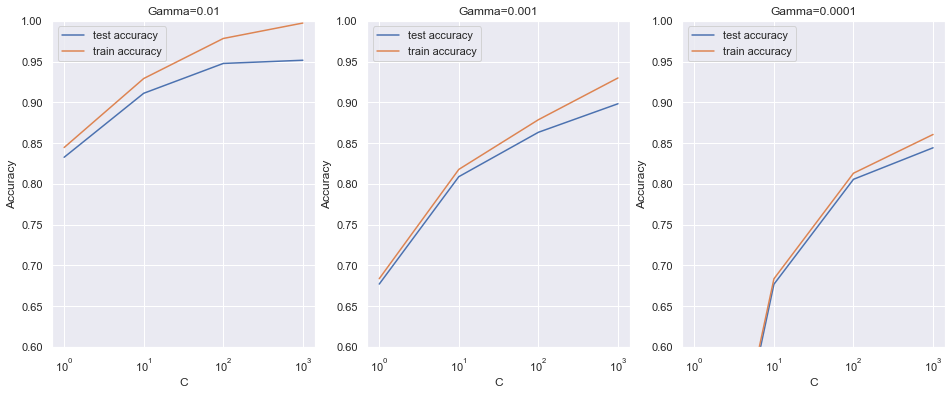

In [55]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))
sns.set(font_scale=1)

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



#### Hence it is quite evident that:

- Non-linear models (high gamma) perform *much better* than the linear ones
- At any value of gamma, a high value of C leads to better performance
- None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other

This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

In [56]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print(f"The best test score is {best_score} corresponding to hyperparameters {best_hyperparams}")

The best test score is 0.9517142857142857 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


## Building and Evaluating the final model

In [57]:
# model with optimal hyperparameters

# model
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.classification_report(y_test, y_pred, digits=3))
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9596666666666667 

              precision    recall  f1-score   support

           A      0.986     0.986     0.986       209
           B      0.906     0.968     0.936       218
           C      0.965     0.957     0.961       230
           D      0.929     0.952     0.940       248
           E      0.934     0.962     0.947       234
           F      0.939     0.964     0.952       225
           G      0.917     0.954     0.935       219
           H      0.929     0.899     0.913       217
           I      0.953     0.944     0.949       215
           J      0.941     0.950     0.946       220
           K      0.966     0.931     0.948       245
           L      0.987     0.979     0.983       237
           M      0.975     0.983     0.979       234
           N      0.957     0.972     0.964       251
           O      0.963     0.950     0.957       221
           P      0.969     0.951     0.960       265
           Q      0.962     0.962     0.962       2

### Thus the SVC with RBF kernel gives almost 96% accuracy in classifying the alphabets. The precision and recall values for individual characters is also decent and hence this model should be treated as the best suited SVC Model for this classification.

-------
